<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/34_Sorting_and_Greedy_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 34 

#Sorting and Greedy Algorithm

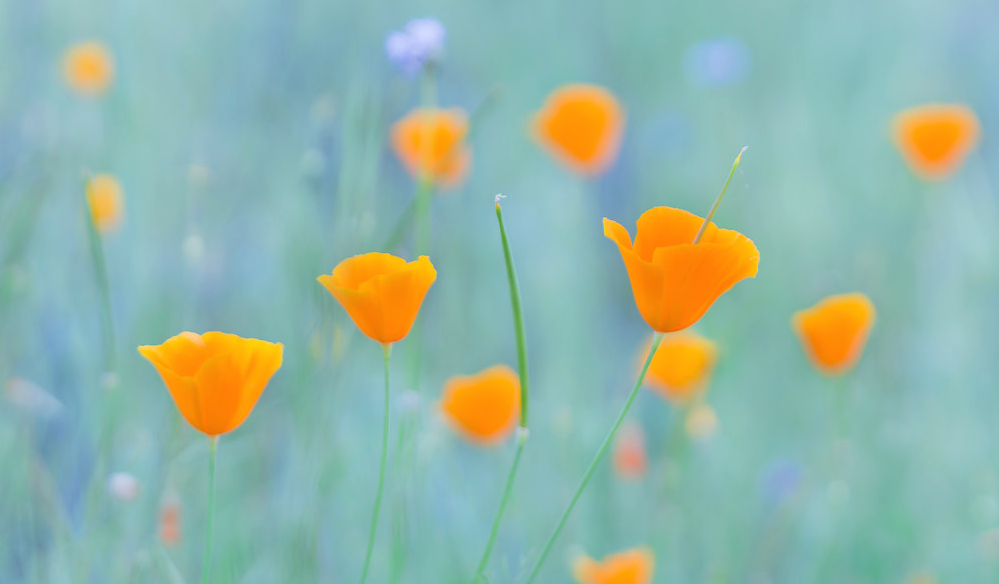

## 34.1 Python Sorting HOWTO


[HOWTO](https://https://docs.python.org/3/howto/sorting.html)


```
Python lists have a built-in list.sort() method that modifies the list in-place. 
There is also a sorted() built-in function that builds a new sorted list from an iterable.

* A simple ascending sort is very easy: just call the sorted() function. It returns a new sorted list:
```






In [ ]:
sorted([5, 2, 3, 1, 4])

[1, 2, 3, 4, 5]



```
You can also use the list.sort() method. It modifies the list in-place (and returns None to avoid confusion). 
Usually it’s less convenient than sorted() - but if you don’t need the original list, it’s slightly more efficient.
```



In [ ]:
alist = [5, 2, 3, 1, 4]
alist.sort()
alist

[1, 2, 3, 4, 5]



```
Another difference is that the list.sort() method is only defined for lists. 
In contrast, the sorted() function accepts any iterable.
```



In [ ]:
sorted({1: 'D', 3: 'B', 2: 'B', 4: 'E', 5: 'A'})

[1, 2, 3, 4, 5]

In [ ]:
sorted({1, 5, 3, 4, 19, 10})

[1, 3, 4, 5, 10, 19]

In [ ]:
blist = [(1,2), (5,1), (3,4), (11,12)]
blist.sort()
blist

[(1, 2), (3, 4), (5, 1), (11, 12)]

### 34.1.1 Key Functions



```
Both list.sort() and sorted() have a key parameter to specify a function (or other callable) 
to be called on each list element prior to making comparisons.

For example, here’s a case-insensitive string comparison:
```



In [ ]:
sorted("This is a test string from Andrew".split(), key=str.lower)

['a', 'Andrew', 'from', 'is', 'string', 'test', 'This']



```
The value of the key parameter should be a function (or other callable) that takes a single argument and 
returns a key to use for sorting purposes. This technique is fast because the key function is called exactly 
once for each input record.

A common pattern is to sort complex objects using some of the object’s indices as keys. For example:
```



In [ ]:
student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

sorted(student_tuples, key=lambda student: student[2])   # sort by age

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

## 34.2 Sorting theory

The basic problem in sorting is as follows:


```
Given an array that contains n elements, your task is to sort the elements in
increasing order.

For example, the array:
1 3 8 2 9 2 5 6 

will be as follows after sorting:
1 2 2 3 5 6 8 9
```




### 34.2.1 O($n^2$) algorithms (Bubble sort)


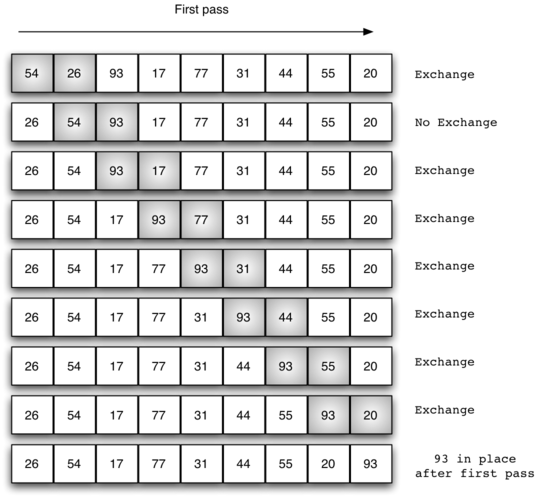

In [ ]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

alist = [54,26,93,17,77,31,44,55,20]

bubbleSort(alist)

print(alist)

### 34.2.2 O($nlogn$) algorithm (Merge sort)

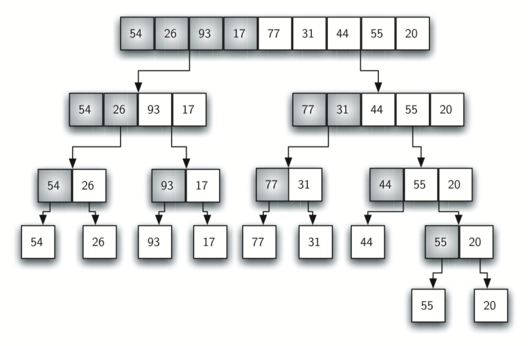

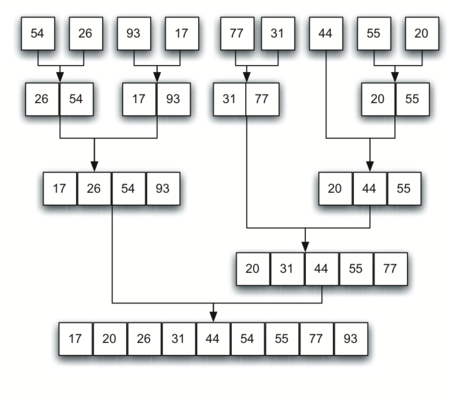

In [ ]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]

mergeSort(alist)

print(alist)

### 34.2.3 O($n$) algorithm (Counting sort)


The lower bound $nlogn$ does not apply to algorithms that do not compare array
elements but use some other information. An example of such an algorithm is
counting sort that sorts an array in $O(n)$ time assuming that every element in
the array is an integer between $0...c$ and $c=O(n)$.

The algorithm creates a bookkeeping array, whose indices are elements of the
original array. The algorithm iterates through the original array and calculates
how many times each element appears in the array.



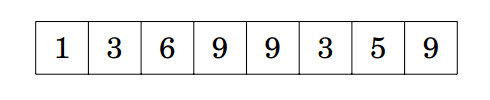

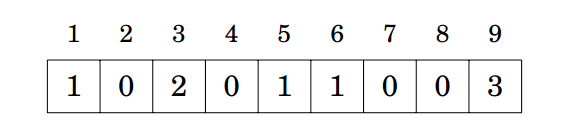

For example, the value at position 3 in the bookkeeping array is 2, because
the element 3 appears 2 times in the original array.

Construction of the bookkeeping array takes $O(n)$ time. After this, the sorted
array can be created in $O(n)$ time because the number of occurrences of each
element can be retrieved from the bookkeeping array. Thus, the total time
complexity of counting sort is $O(n)$.

Counting sort is a very efficient algorithm but it can only be used when the
constant c is small enough, so that the array elements can be used as indices in
the bookkeeping array.

In [ ]:
def countingSort(alist):
    n = max(alist)
    blist = [0] * (n+1)

    for i in alist:
        blist[i] = i
    
    clist= []
    for j in blist:
        if j != 0:
            clist.append(j)
    return clist
   

alist = [54,26,93,17,77,31,44,55,20]

print(countingSort(alist))

#### 34.2.3.1 Anagram detection
A good example problem for showing algorithms with different orders of magnitude is the classic anagram detection problem for strings. One string is an anagram of another if the second is simply a rearrangement of the first. For example, *'heart'* and *'earth'* are anagrams. The strings *'python'* and *'typhon'* are anagrams as well. For the sake of simplicity, we will assume that the two strings in question are of equal length and that they are made up of symbols from the set of 26 lowercase alphabetic characters. Our goal is to write a boolean function that will take two strings and return whether they are anagrams.

In [ ]:
def anagram(s1,s2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(s1)):
        pos = ord(s1[i])-ord('a')
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i])-ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    flag = True
    while j<26 and flag:
        if c1[j]==c2[j]:
            j = j + 1
        else:
            flag = False

    return flag

print(anagram('applpleapeappleappleplpleappleapeappleap','ppleapppleaplepleapapleapplepleapappleap'))

True


#### 34.2.3.2 CCC 2017 J5/S3 - Nailed It!



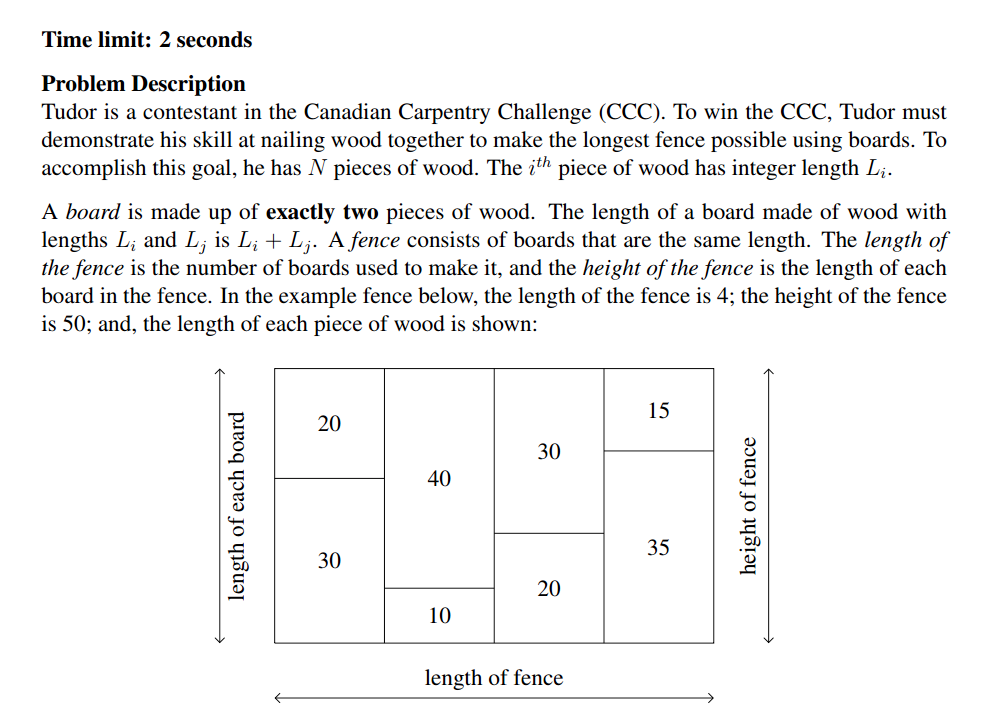

**Input Specification**
The first line will contain the integer $N (2 ≤ N ≤ 1 000 000)$.

The second line will contain $N$ space-separated integers $L_1,L_2,...L_N (1 ≤ L_i ≤ 2 000)$.

For 7 of the 15 available marks, $N ≤ 100$.

For an additional 6 of the 15 available marks, $N ≤ 1000$.

For an additional 1 of the 15 available marks, $N ≤ 100 000$.

**Output Specification**

Output two integers on a single line separated by a single space: the length of the longest fence
and the number of different heights a longest fence could have.







```
import sys

all_data = sys.stdin.read().split("\n")

n = int(all_data[0])
nums = map(int, all_data[1].split())

heights = [0] * 4001
counts = [0] * 2001

for i in nums:
    counts[i] += 1

for x in range(1, 2001):
    for y in range(x, 2001):
        if x == y:
            heights[x+y] += counts[x]/2
        else:
            heights[x+y] += min(counts[x], counts[y])

length = max(heights)
number = heights.count(length)
print(int(length), number)
```



## 34.3 Binary search

A general method for searching for an element in an array is to use a for loop
that iterates through the elements of the array.

The time complexity of this approach is $O(n)$, because in the worst case, it
is necessary to check all elements of the array. If the order of the elements is
arbitrary, this is also the best possible approach, because there is no additional information available where in the array we should search for the element $x$.

However, if the array is sorted, the situation is different. In this case it is
possible to perform the search much faster, because the order of the elements in
the array guides the search. The binary search algorithm efficiently
searches for an element in a sorted array in $O(log n)$ time.

In [ ]:
def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first<=last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    return found

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]

In [ ]:
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))

False
True


### 34.3.1 bisect — Array bisection algorithm
[Python bisect](https://docs.python.org/3.6/library/bisect.html#module-bisect)

## 34.4 Greedy algorithm

A greedy algorithm constructs a solution to the problem by always making a
choice that looks the best at the moment. A greedy algorithm never takes back
its choices, but directly constructs the final solution. For this reason, greedy
algorithms are usually very efficient.

The difficulty in designing greedy algorithms is to find a greedy strategy that
always produces an optimal solution to the problem. The locally optimal choices
in a greedy algorithm should also be globally optimal. It is often difficult to argue that a greedy algorithm works.

贪心算法（又称贪婪算法），是指在对问题求解时，总是做出在当前看来是最好的选择。也就是说，不从整体最优上加以考虑，所做出的是在某种意义上的局部最优解。
- 贪心算法不是对所有问题都能得到整体最优解；
- 算法的关键是贪心策略的选择；
- 选择的贪心策略必须具备无后效性，即某个状态以前的过程不会影响以后的状态，只与当前状态有关。

### 34.4.1 Scheduling

Many scheduling problems can be solved using greedy algorithms. A classic
problem is as follows: Given n events with their starting and ending times, find a
schedule that includes as many events as possible. It is not possible to select an
event partially. For example, consider the following events:

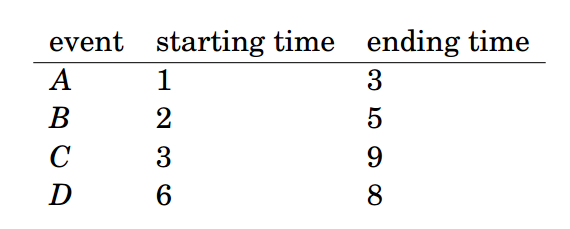

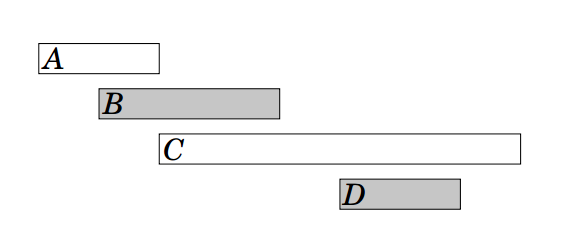

- The first idea is to select as short events as possible.
- Another idea is to always select the next possible event that begins as early as possible.
- The third idea is to always select the next possible event that ends as early as possible.

### **统筹法（华罗庚）**

统筹方法，是一种安排工作进程的数学方法。它的实用范围极广泛，在企业管理和基本建设中，以及关系复杂的科研项目的组织与管理中，都可以应用。

怎样应用呢？主要是把工序安排好。

比如，想泡壶茶喝。当时的情况是：开水没有；水壶要洗，茶壶，茶杯要洗；火已生了，茶叶也有了。怎么办？

- 办法甲：洗好水壶，灌上凉水，放在火上；在等待水开的时间里，洗茶壶、洗茶杯、拿茶叶；等水开了，泡茶喝。

- 办法乙：先做好一些准备工作，洗水壶，洗茶壶茶杯，拿茶叶；一切就绪，灌水烧水；坐待水开了泡茶喝。

- 办法丙：洗净水壶，灌上凉水，放在火上，坐待水开；水开了之后，急急忙忙找茶叶，洗茶壶茶杯，泡茶喝。

哪一种办法省时间？我们能一眼看出第一种办法好，后两种办法都窝了工。

### 34.4.2 2013J4

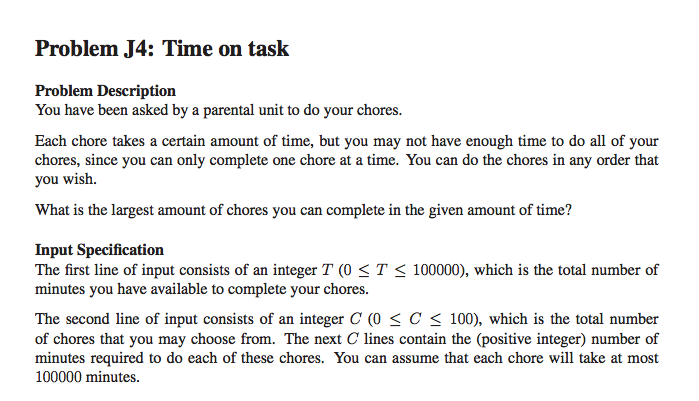

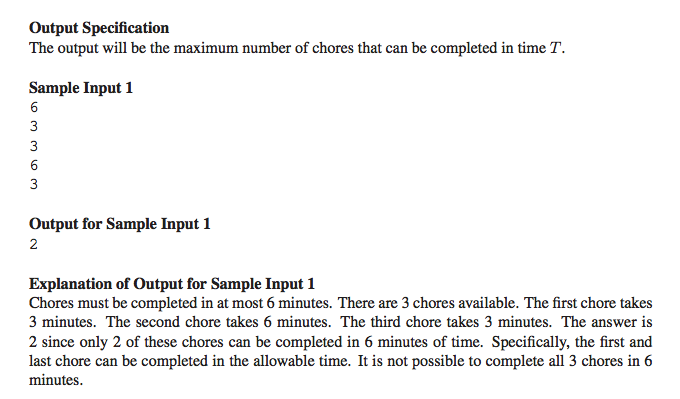

In [ ]:
t = int(input())

c = int(input())

alist = []
for i in range(c):
    alist.append(int(input()))

alist.sort()

ct = 0
ans = 0
for i in range(len(alist)):
    ct = ct + alist[i]
    if ct > t:
        ans = i
        break
    elif ct == t:
        ans = i+1
        break
else:
    ans = i+1

print(ans)

### 34.4.3 Tasks and deadlines

### 34.4.4 Minimizing sums

### 34.4.5 Data compression